In [1]:
%autosave 0
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, timedelta
import shutil

from sklearn.metrics import mean_absolute_error, mean_squared_error

Autosave disabled


In [2]:
path = r'C:\Users\utilisateur\0-DataScience\Formation-P3\Covid-19\AzureSC\Rapport'
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0, header=0)
    li.append(df)
    os.unlink(filename)

frame = pd.concat(li, axis=0, ignore_index=True)
frame

,date,country,total_cases_predict,total_cases_real,total_deaths_predict,total_deaths_real,error_abs_cases,error_abs_deaths
0,2020-03-29,France,37972.0,37575.0,2517.0,2314.0,397.0,203.0
1,2020-03-29,China,82472.0,82342.0,3304.0,3306.0,130.0,-2.0
2,2020-03-29,Italy,93505.0,92472.0,10092.0,10023.0,1033.0,69.0
3,2020-03-29,Spain,74605.0,72248.0,5565.0,5690.0,2357.0,-125.0
4,2020-03-29,United States,128133.0,124665.0,2201.0,2191.0,3468.0,10.0
...,...,...,...,...,...,...,...,...
1743,2020-09-24,United Kingdom,406755.0,409729.0,41864.0,41862.0,-2974.0,2.0
1744,2020-09-24,Germany,277524.0,278070.0,9422.0,9428.0,-546.0,-6.0
1745,2020-09-24,Iran,431846.0,432798.0,24867.0,24840.0,-952.0,27.0
1746,2020-09-24,Turkey,307637.0,308069.0,7694.0,7711.0,-432.0,-17.0


In [3]:
def showMetricsGeneral(subject):
    print(f"-- Global performances for {subject} --")
    MAPE =mean_absolute_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict']) 
    print("MAPE = ",MAPE)
    RMSE = mean_squared_error(frame[f'total_{subject}_real'],frame[f'total_{subject}_predict'], squared=False)
    print("RMSE = ",RMSE)

In [4]:
showMetricsGeneral("cases")

-- Global performances for cases --
MAPE =  10896.326659038901
RMSE =  39850.65425509253


In [5]:
showMetricsGeneral("deaths")

-- Global performances for deaths --
MAPE =  315.9954233409611
RMSE =  790.7257550375059


In [6]:
def visFollow(country,subject):
    df = frame[frame['country'].isin([f"{country}"])]
    list_value_predict = df[f"total_{subject}_predict"]
    list_value_real = df[f"total_{subject}_real"]
    
    print(f"-- {country} performances for {subject} --")
    MAPE =mean_absolute_error(list_value_real,list_value_predict) 
    print("MAE = ",MAPE)
    RMSE = mean_squared_error(list_value_real,list_value_predict, squared=False)
    print("RMSE = ",RMSE)
    
    this_graf = plt.plot(df["date"], list_value_predict, 'go--', 
                         linewidth=2, markersize=12,label=f'{subject} predict')
    this_graf = plt.plot(df["date"], list_value_real, color='red',
                         marker='o',linewidth=2, markersize=12,label=f'{subject} real')
    this_graf =plt.title(f"{country}")
    plt.legend()
    plt.xticks(rotation=70)
    return this_graf

def visMetrics(country):
    vv = frame[frame['country'].isin([f"{country}"])]
    plt.plot(vv["error_abs_cases"],marker='o',label="error_abs_cases",color='blue',markersize=12)
    plt.plot(vv["error_abs_deaths"],marker='o',label="error_abs_deaths",color='orange',markersize=12)
    plt.title("Abs error over time")
    plt.legend()

def visShow(country):
    f0 = plt.figure(figsize=(20,10))
#     ax1 = plt.subplot(1,2,1)
    v = visFollow(f"{country}","cases")
    f1 = plt.figure(figsize=(20,10))
#     ax2 = f1.add_subplot(1,2,2)
    v = visFollow(f"{country}","deaths")
    f2 = plt.figure(figsize=(20,10))
#     ax3 = f2.add_subplot(1,2,1)
    v = visMetrics(country)

-- World performances for cases --
MAE =  79695.39393939394
RMSE =  125924.06194932795
-- World performances for deaths --
MAE =  1873.030303030303
RMSE =  2277.99185621233


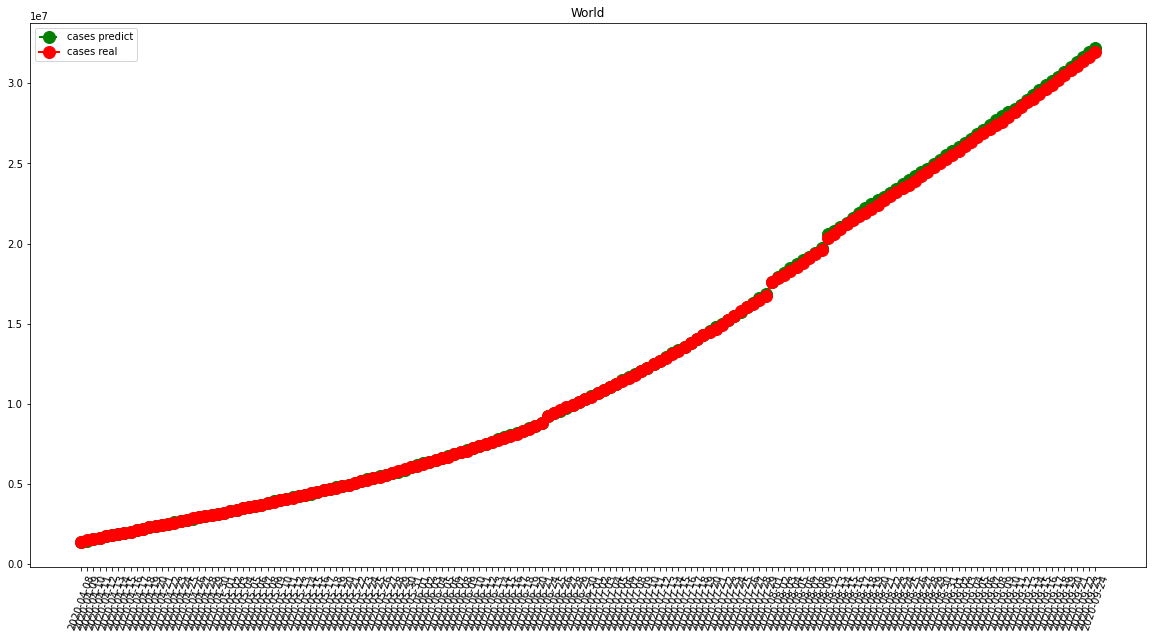

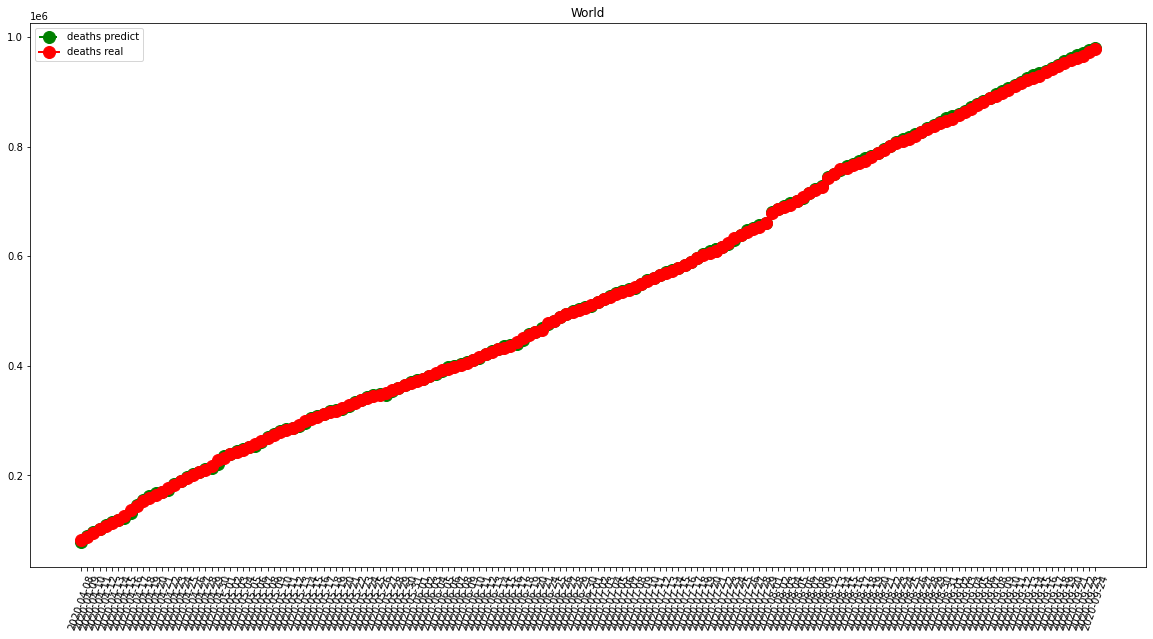

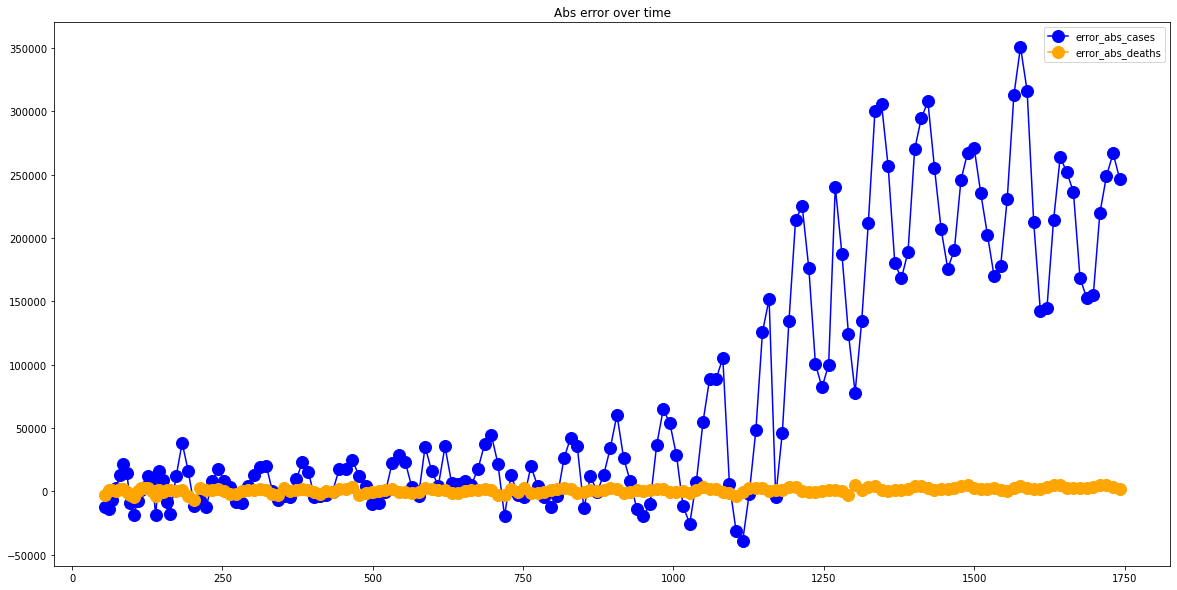

In [7]:
visShow("World")

-- France performances for cases --
MAE =  1231.297142857143
RMSE =  1890.0793860878664
-- France performances for deaths --
MAE =  110.53714285714285
RMSE =  254.03844478458655


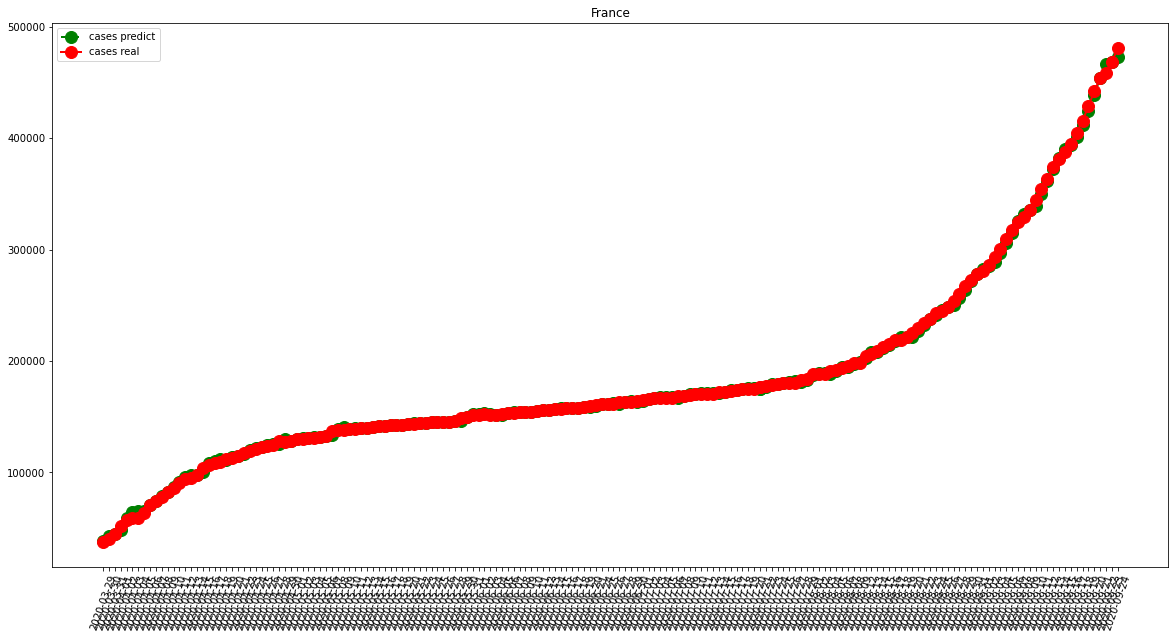

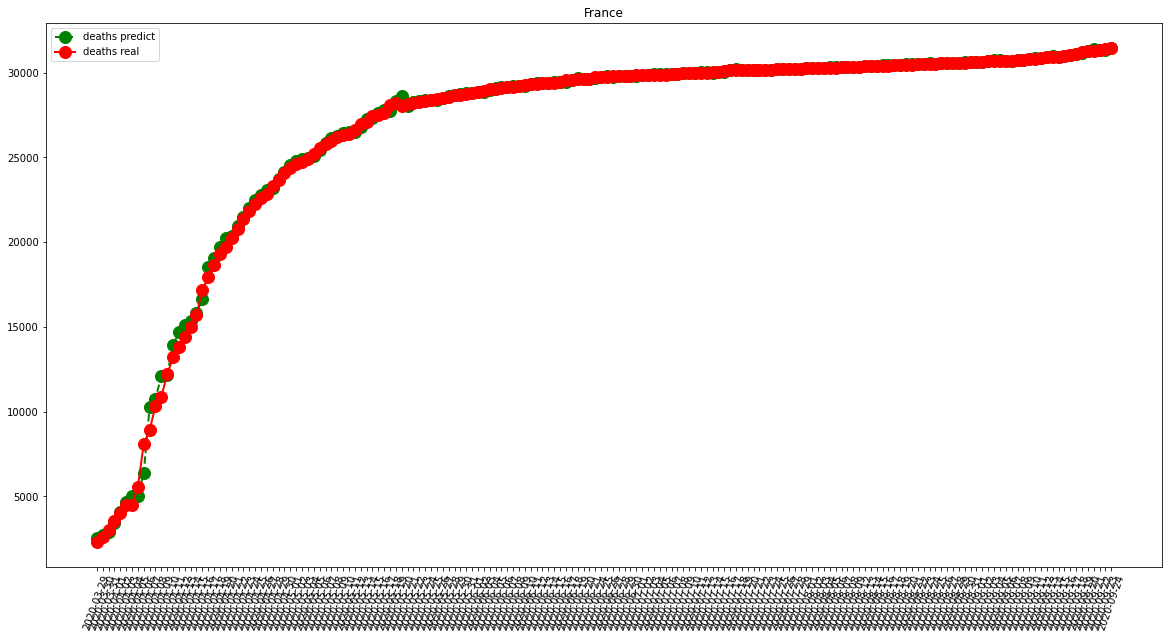

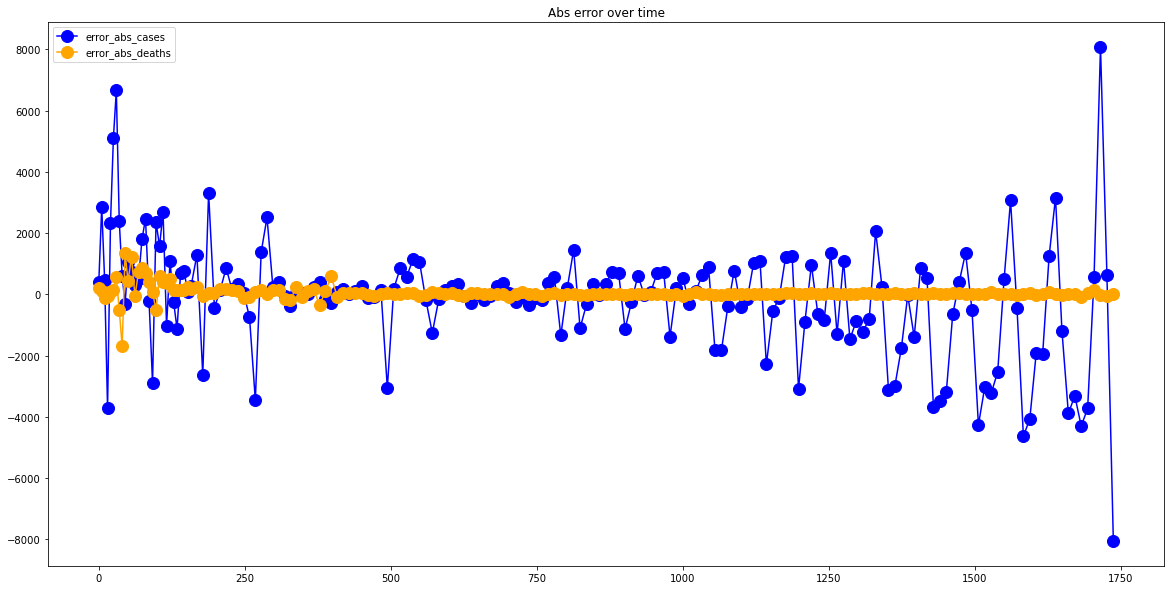

In [8]:
visShow("France")

-- Italy performances for cases --
MAE =  302.84
RMSE =  444.4745276326707
-- Italy performances for deaths --
MAE =  65.83428571428571
RMSE =  224.4825796613817


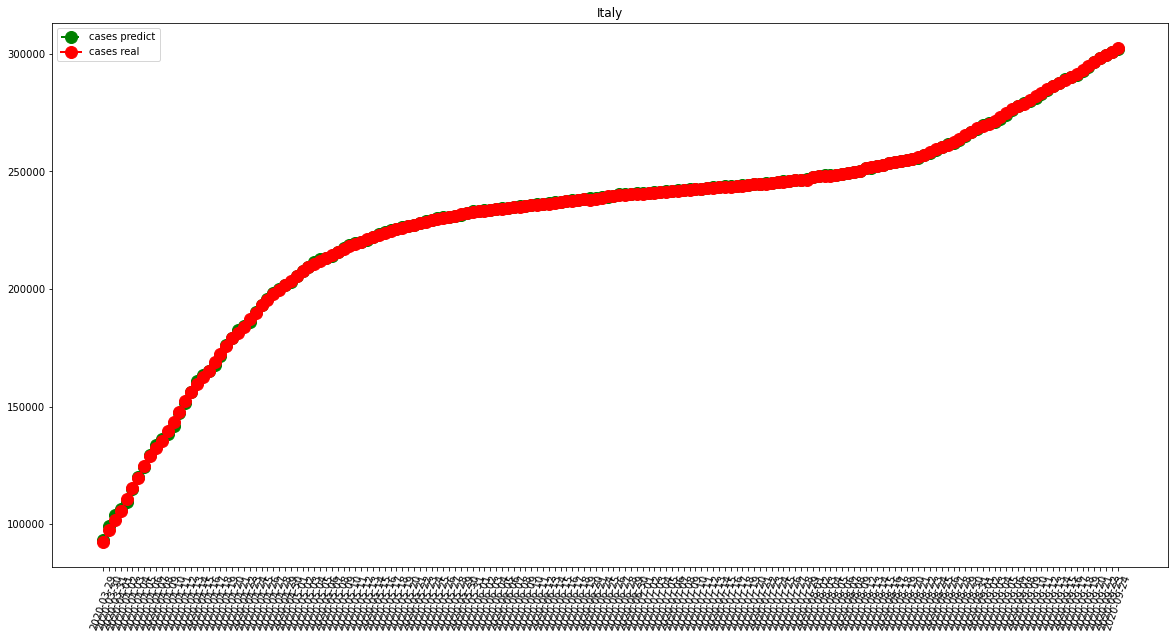

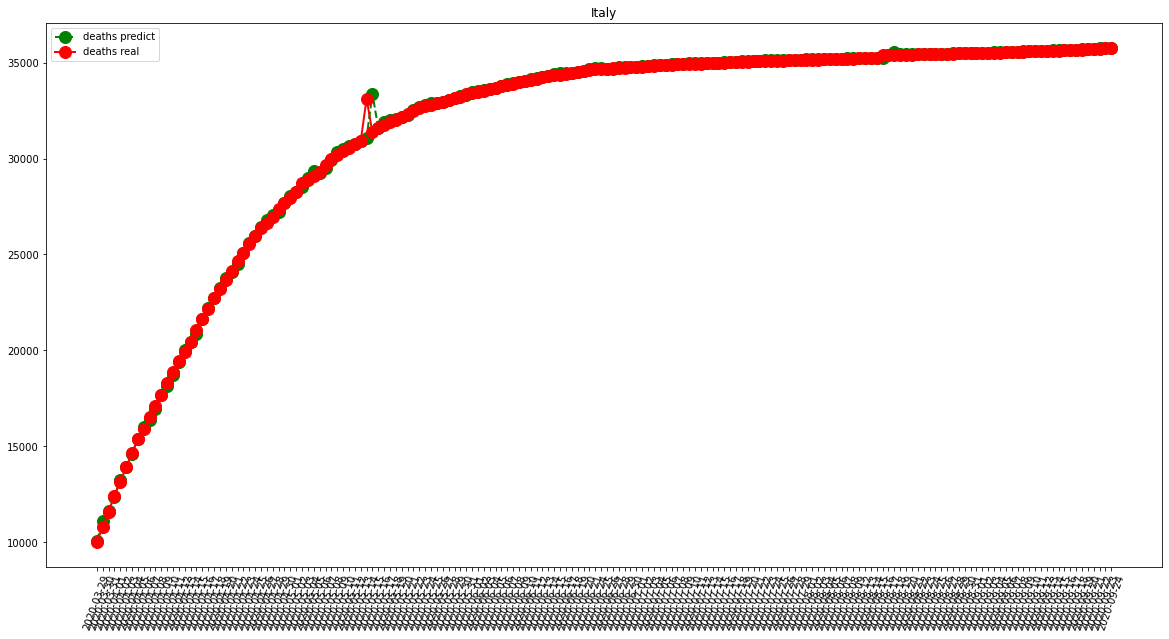

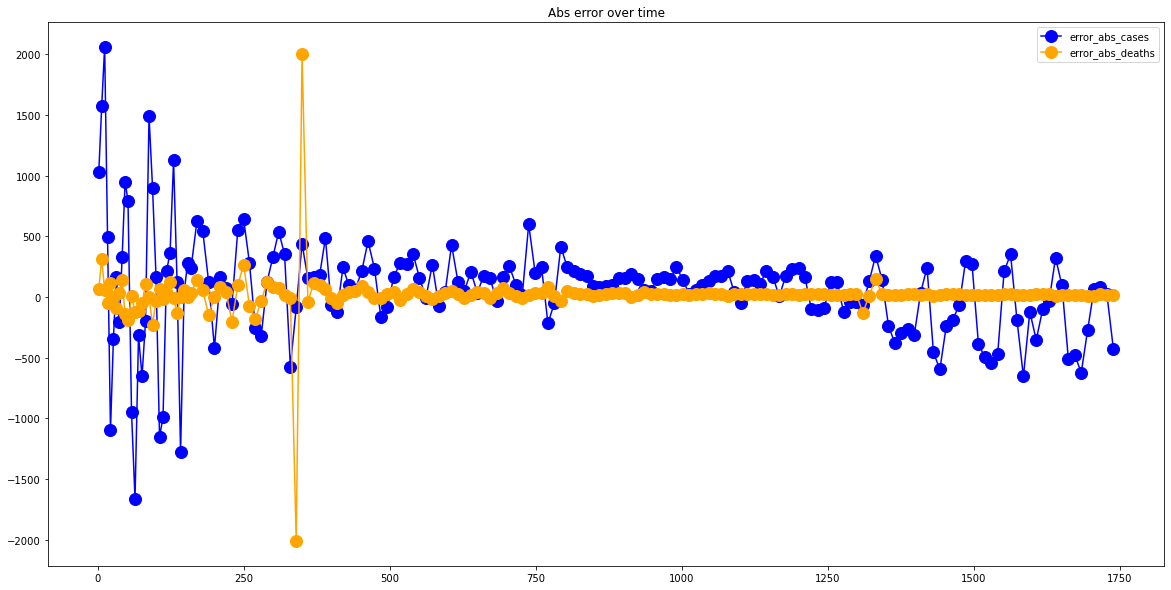

In [9]:
visShow("Italy")

-- Spain performances for cases --
MAE =  2703.897142857143
RMSE =  5295.59304435571
-- Spain performances for deaths --
MAE =  120.38857142857142
RMSE =  309.2728984477717


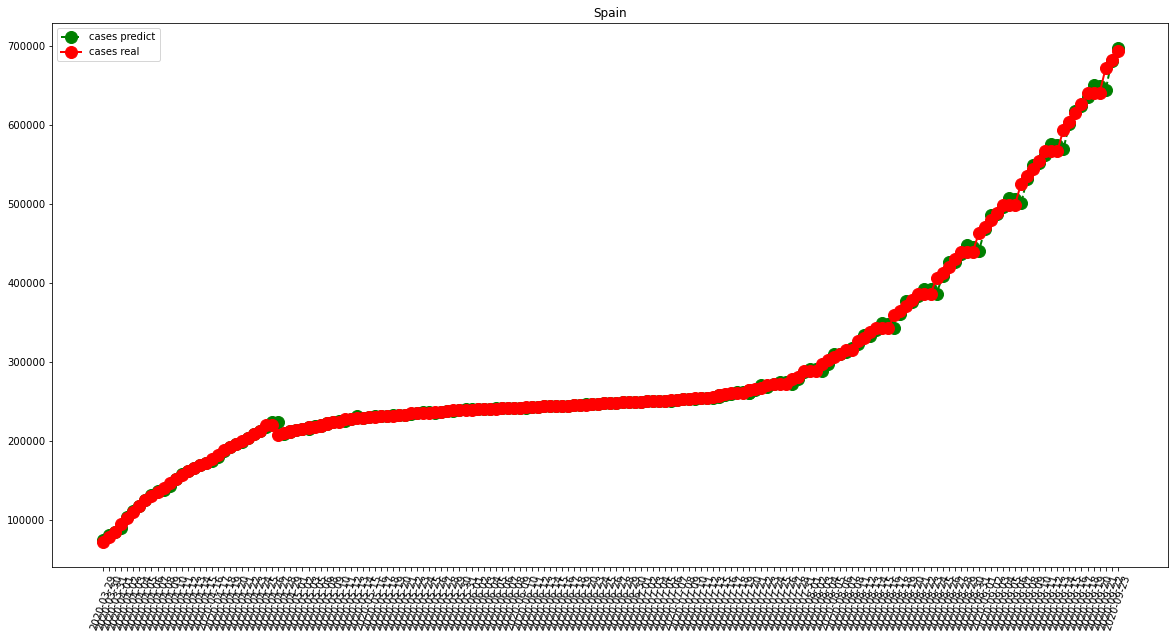

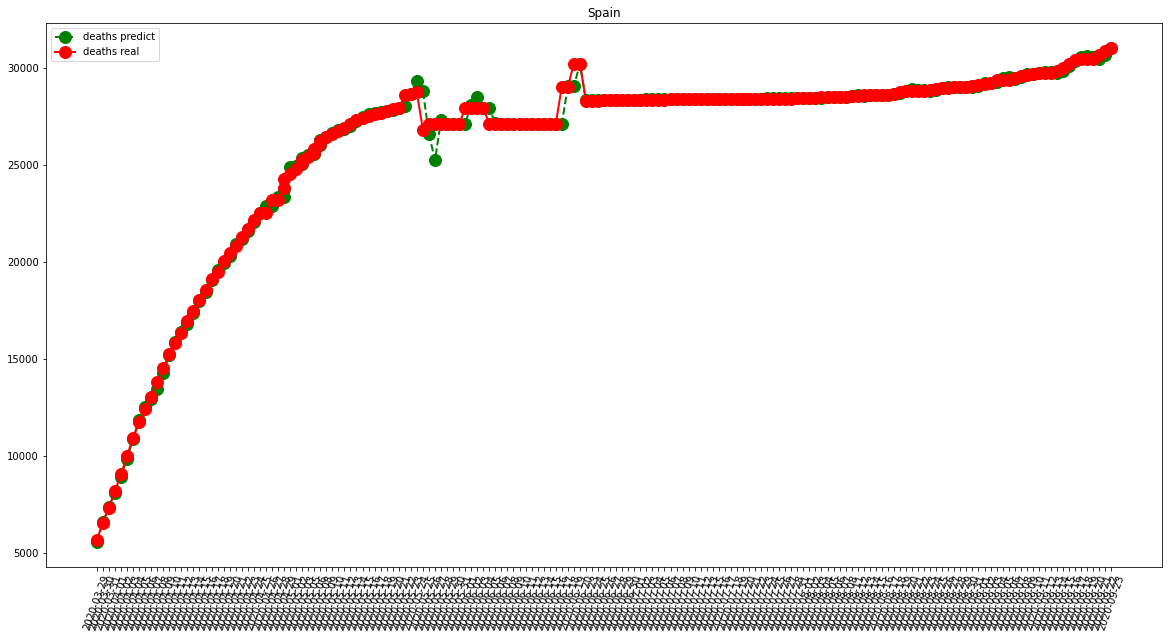

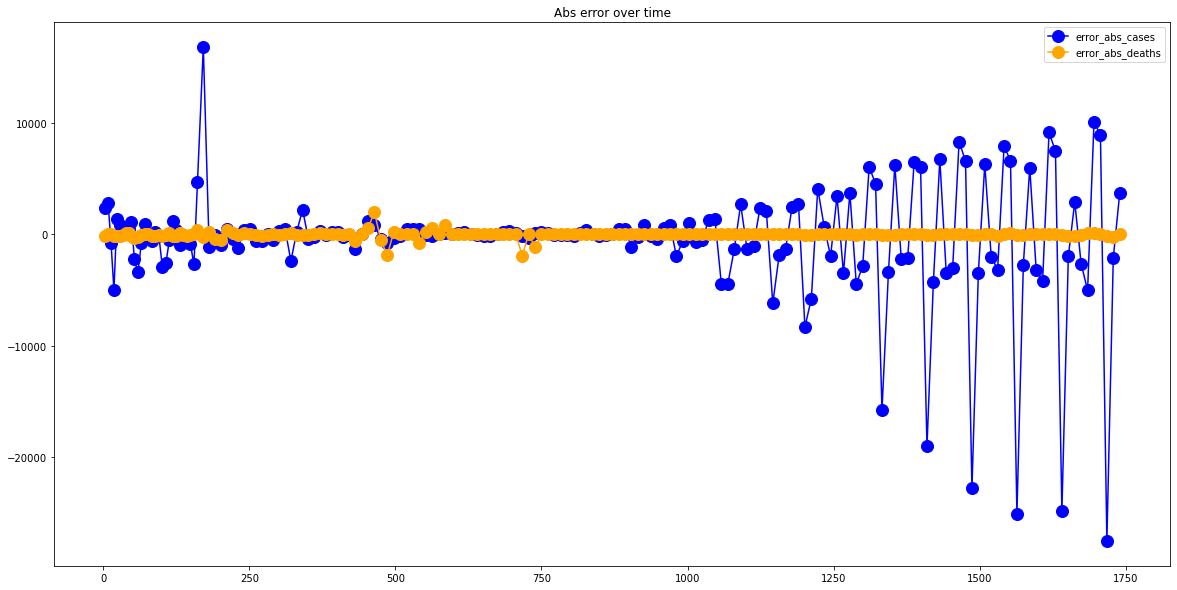

In [10]:
visShow("Spain")

-- United States performances for cases --
MAE =  15804.234285714285
RMSE =  23238.79450487912
-- United States performances for deaths --
MAE =  480.8228571428571
RMSE =  671.81882761862


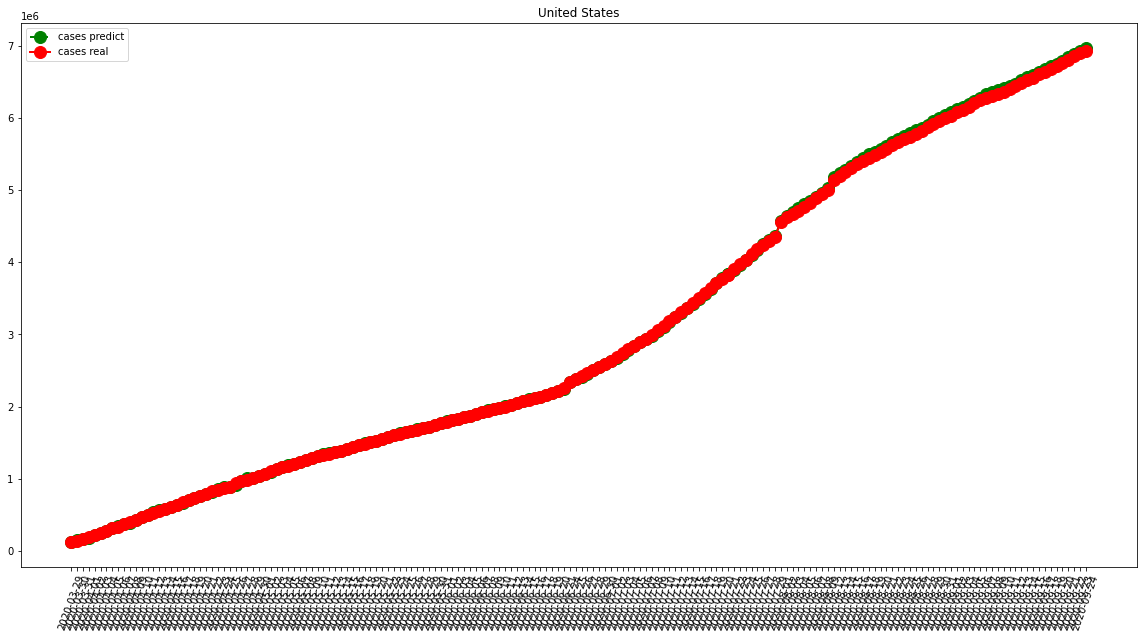

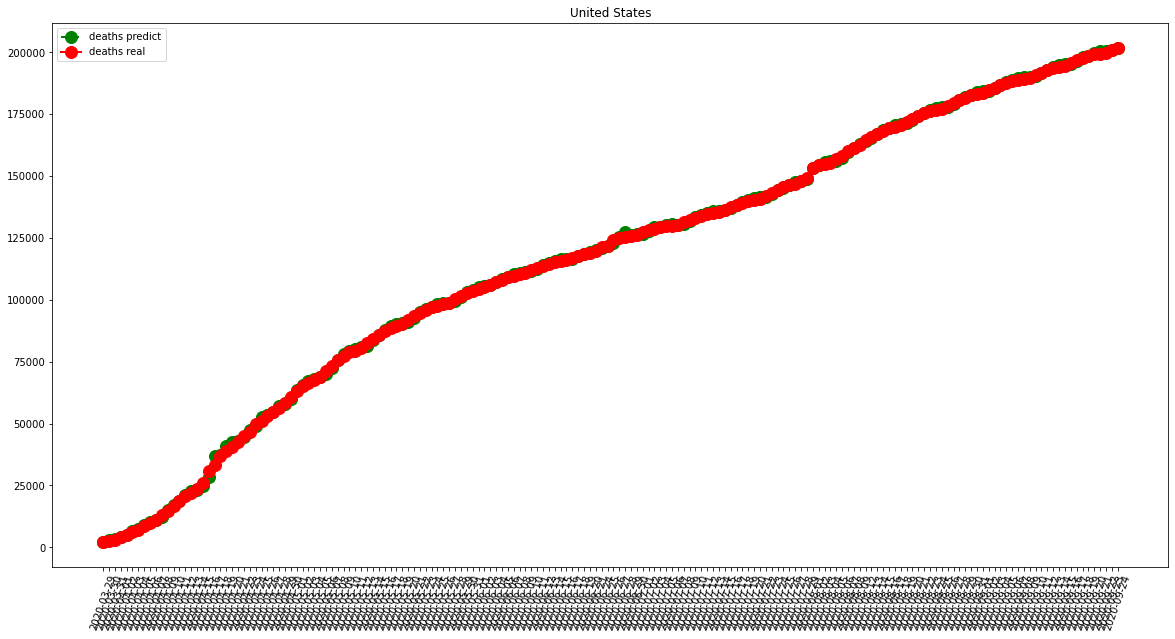

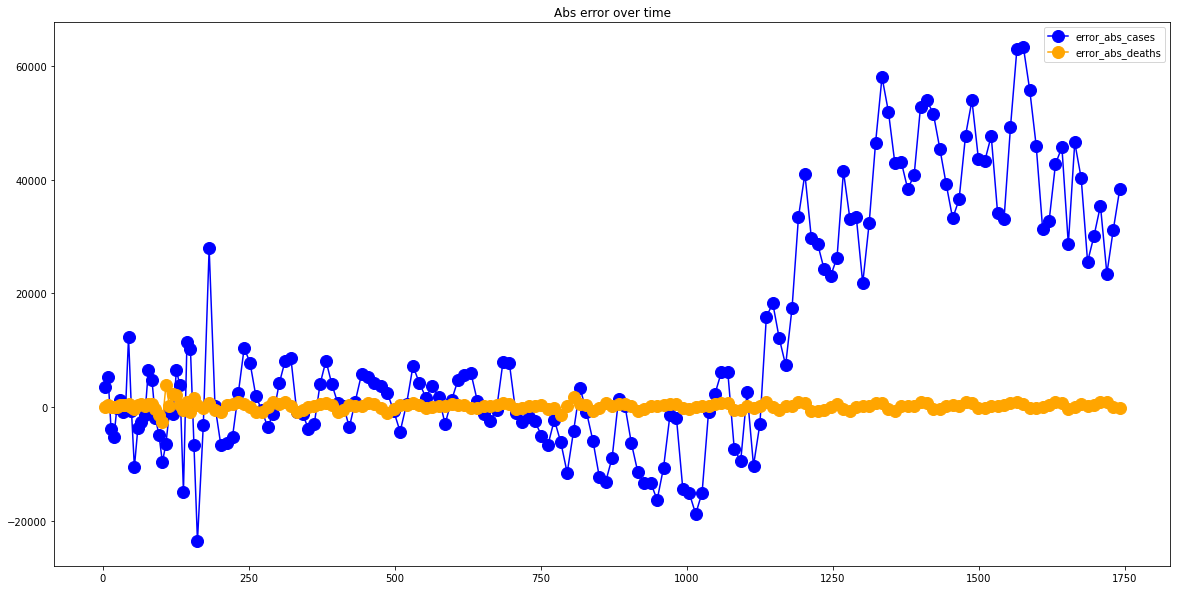

In [11]:
visShow("United States")

-- China performances for cases --
MAE =  58.434285714285714
RMSE =  90.28861658987962
-- China performances for deaths --
MAE =  24.457142857142856
RMSE =  118.71247376990941


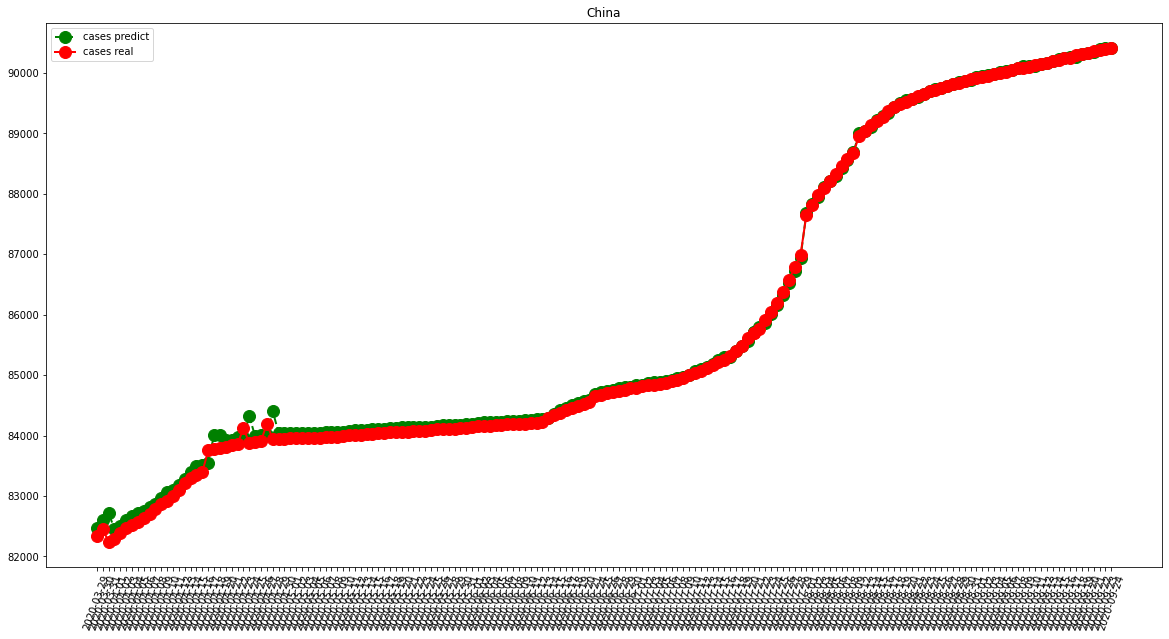

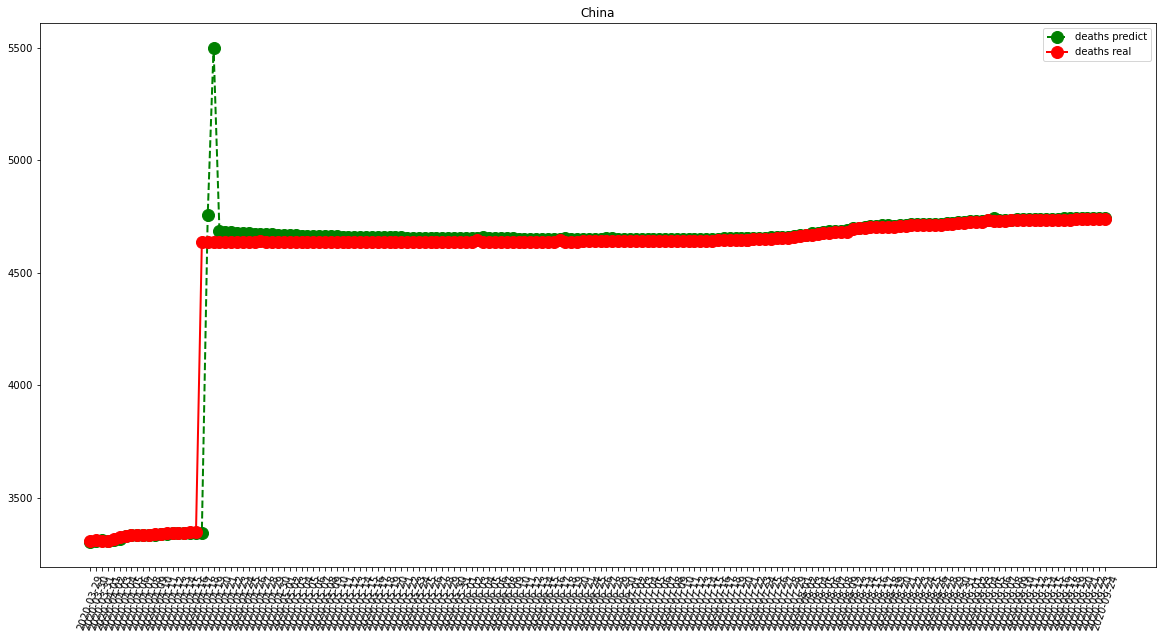

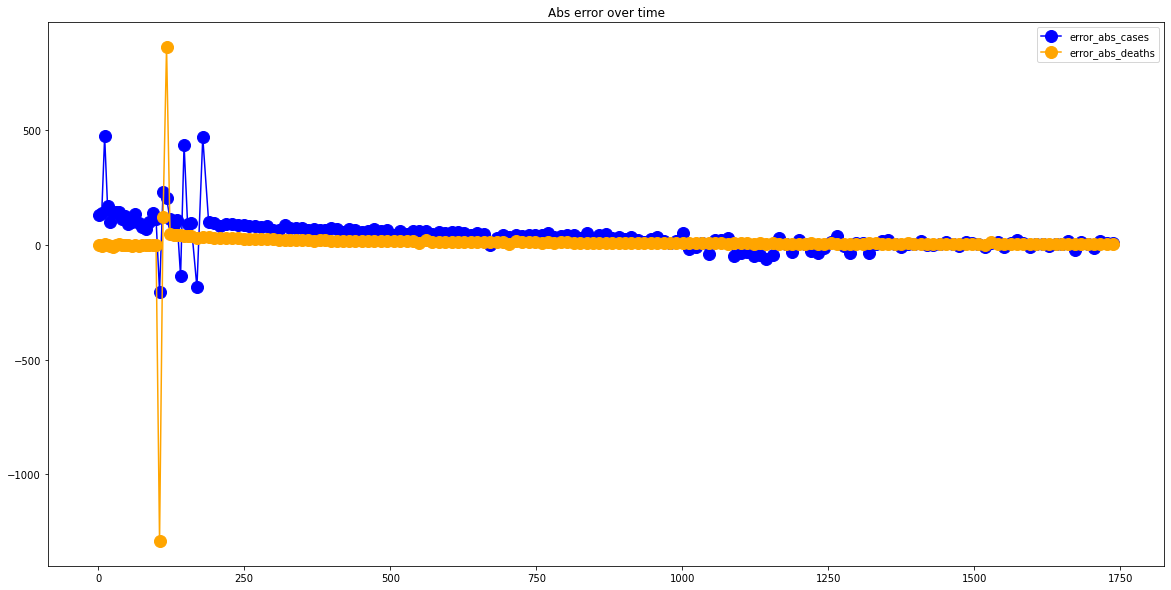

In [12]:
visShow("China")

-- United Kingdom performances for cases --
MAE =  1040.748299319728
RMSE =  3480.557152991184
-- United Kingdom performances for deaths --
MAE =  210.05442176870747
RMSE =  703.9834858143475


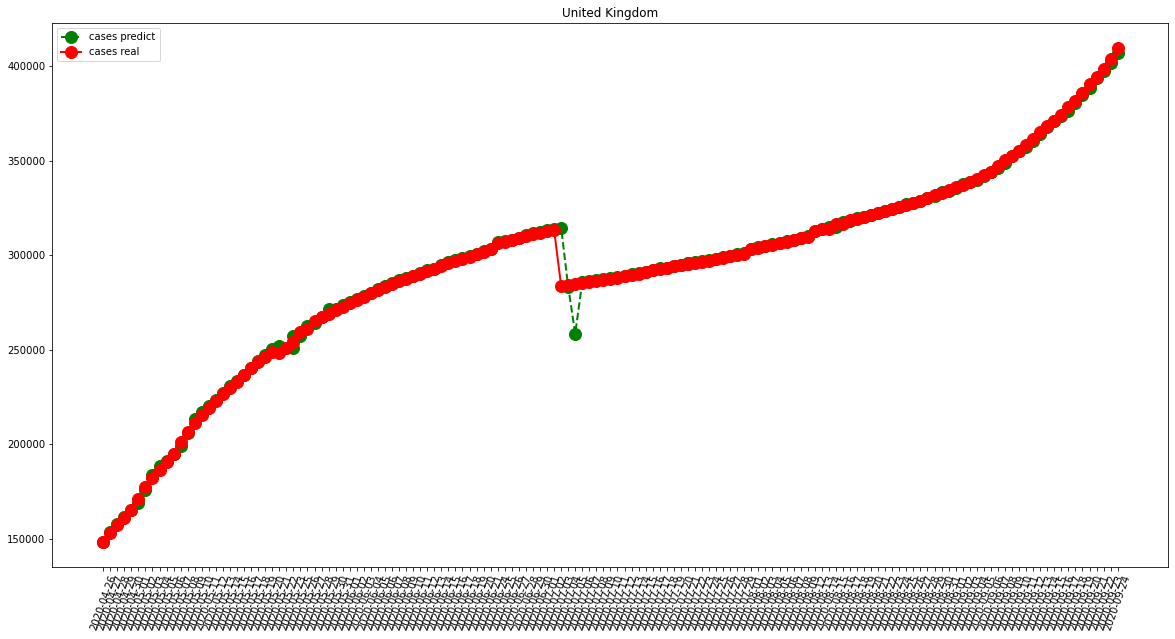

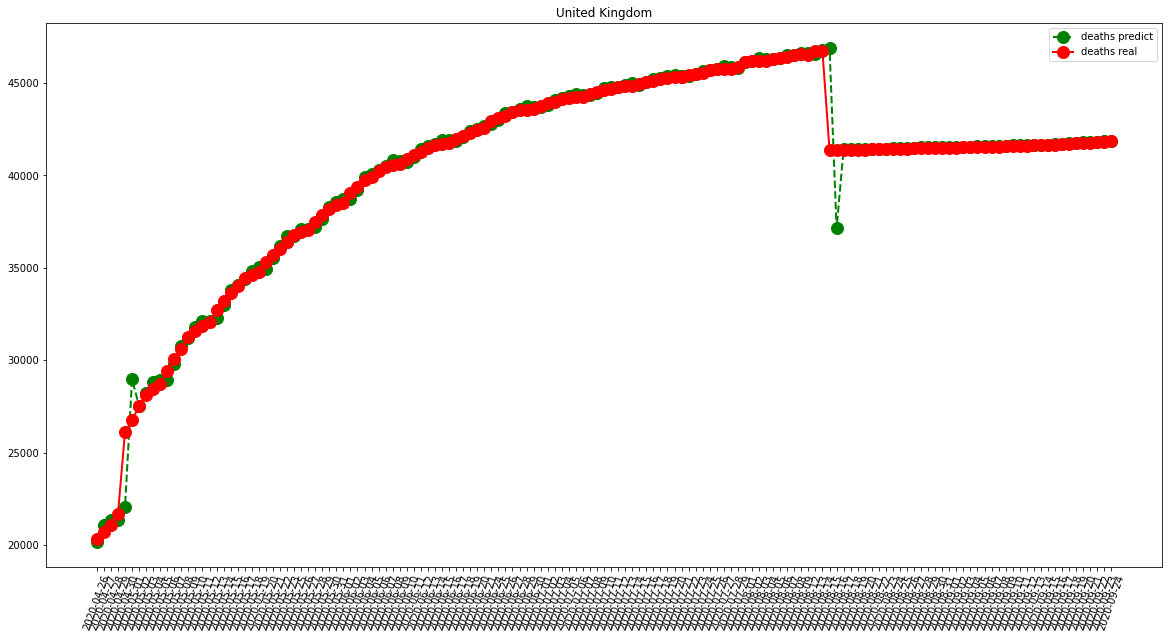

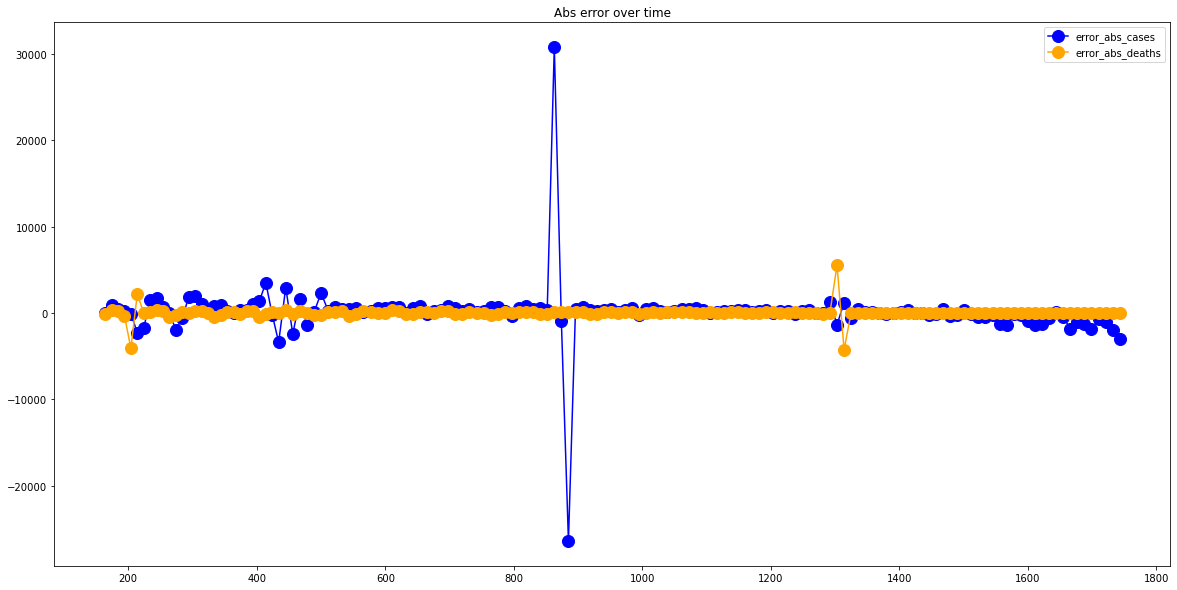

In [13]:
visShow("United Kingdom")

-- Germany performances for cases --
MAE =  421.9183673469388
RMSE =  588.6683923827371
-- Germany performances for deaths --
MAE =  18.700680272108844
RMSE =  36.362966134825264


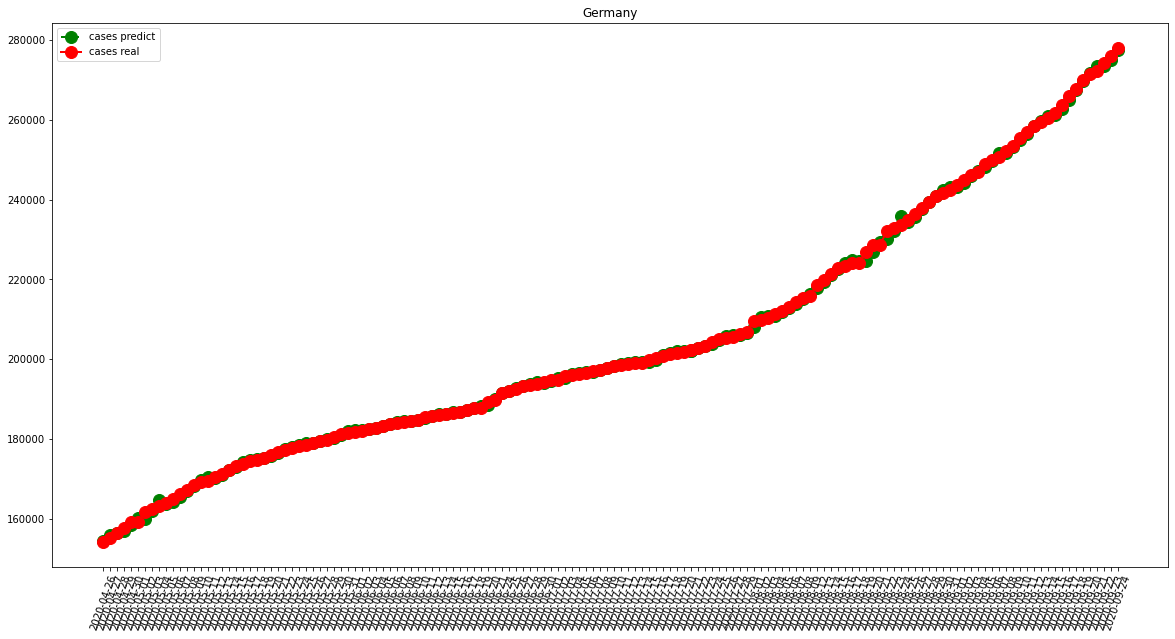

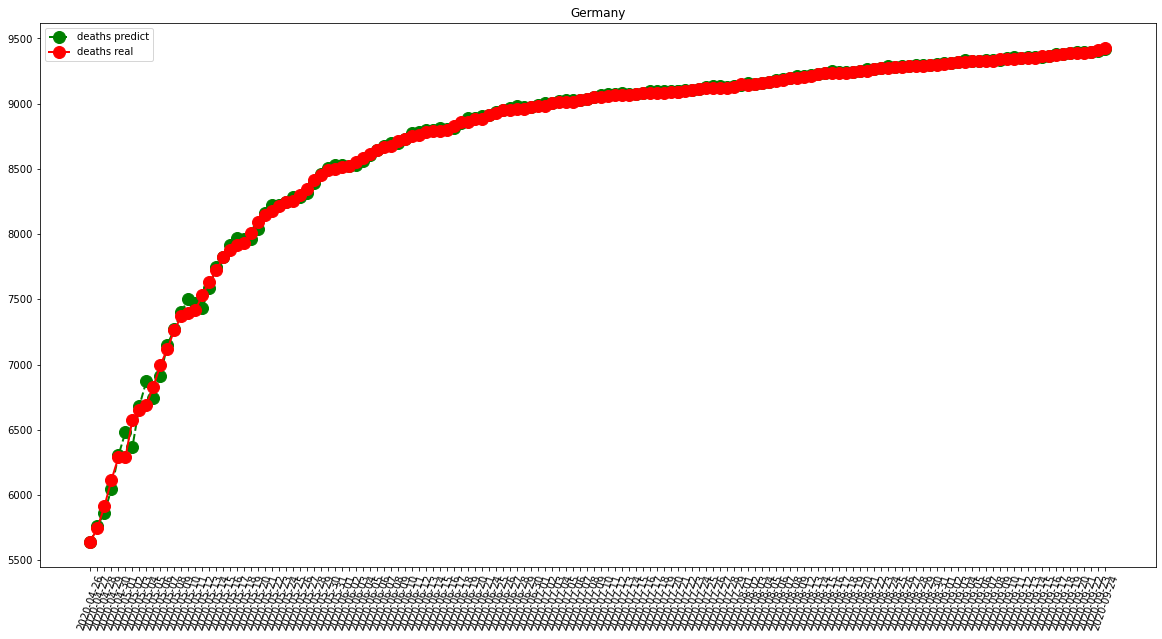

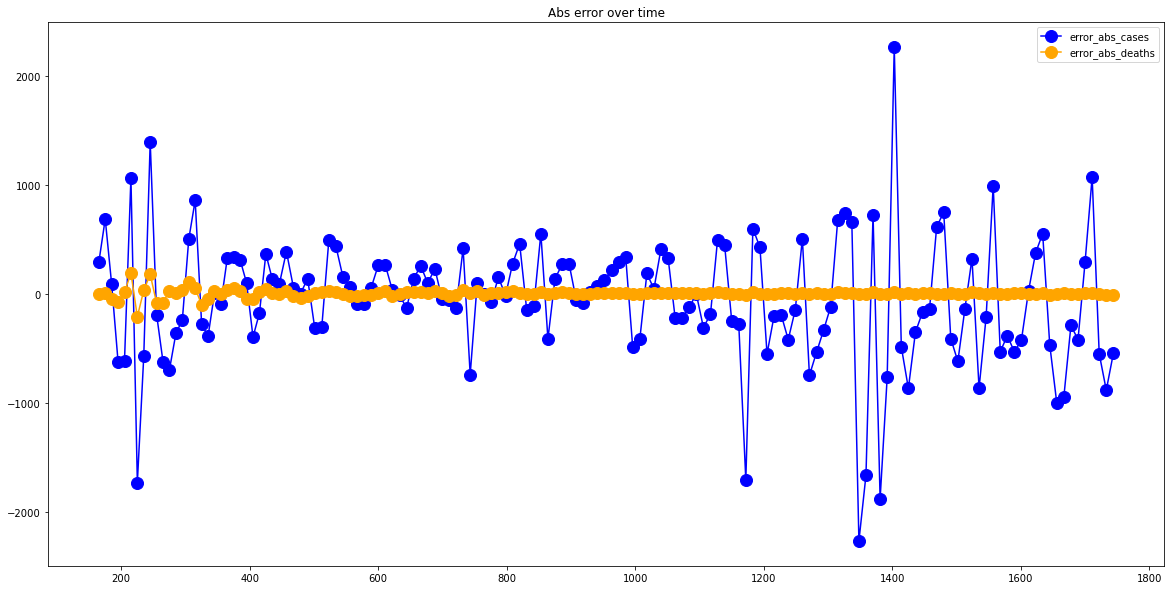

In [14]:
visShow("Germany")

-- Iran performances for cases --
MAE =  867.4625850340136
RMSE =  1220.8272900409966
-- Iran performances for deaths --
MAE =  51.4421768707483
RMSE =  84.61903422032748


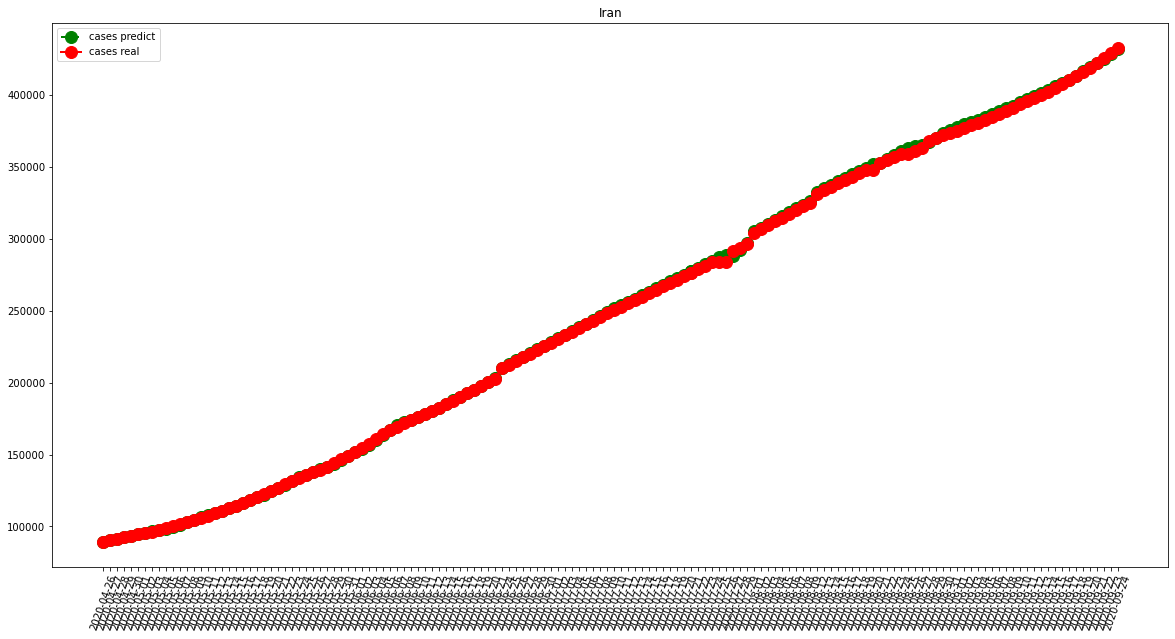

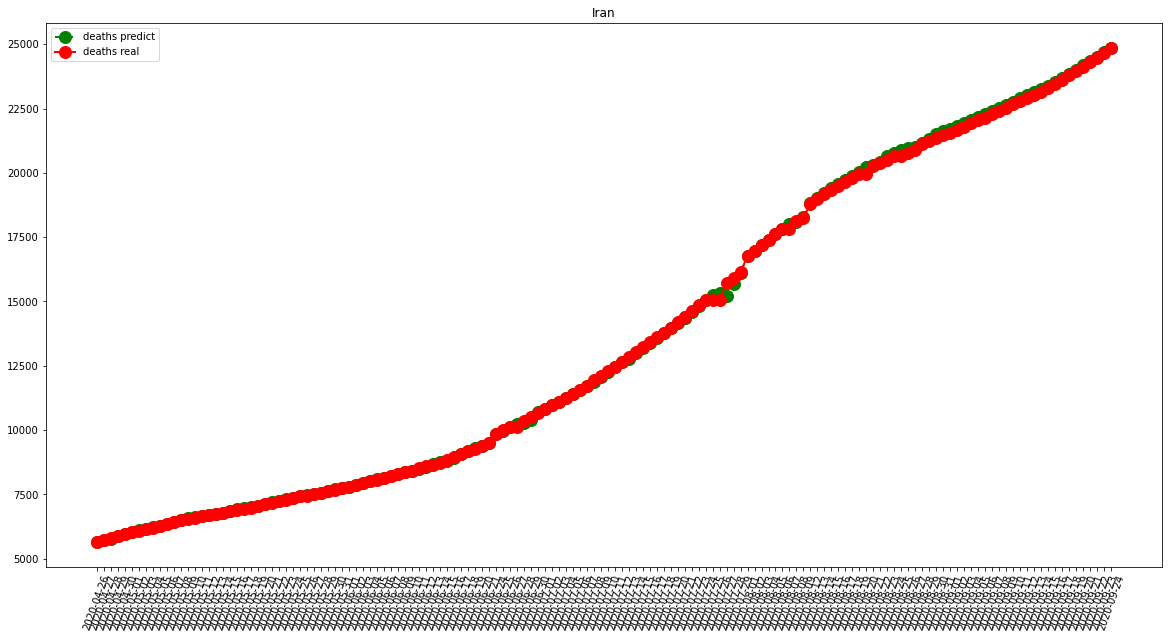

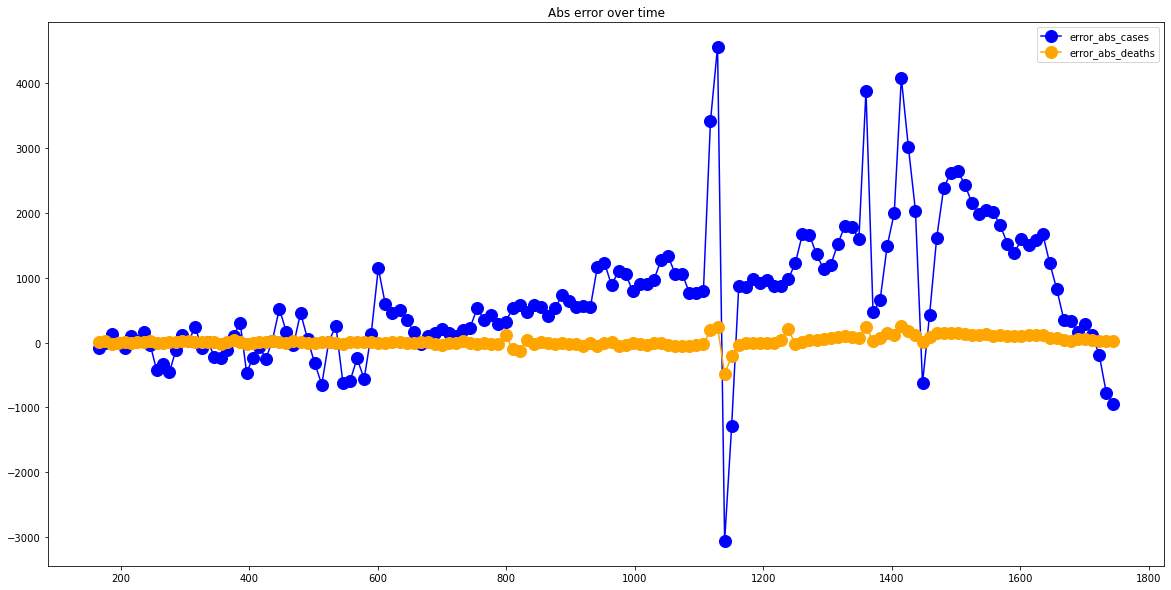

In [15]:
visShow("Iran")

-- Turkey performances for cases --
MAE =  225.08843537414967
RMSE =  332.8176146568122
-- Turkey performances for deaths --
MAE =  15.877551020408163
RMSE =  83.965574416393


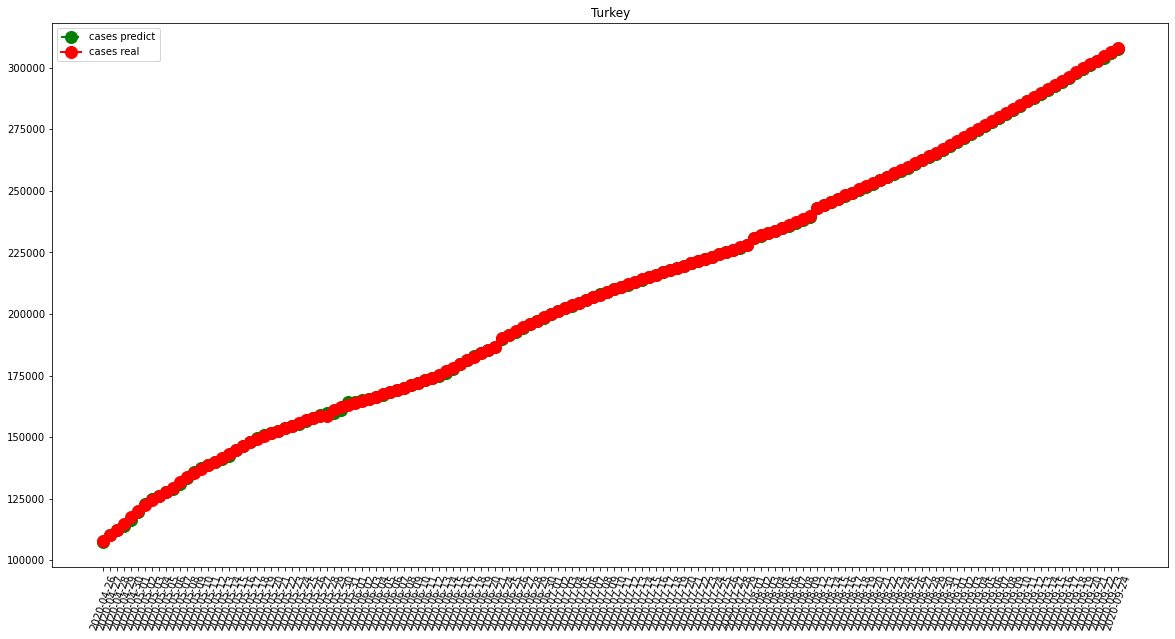

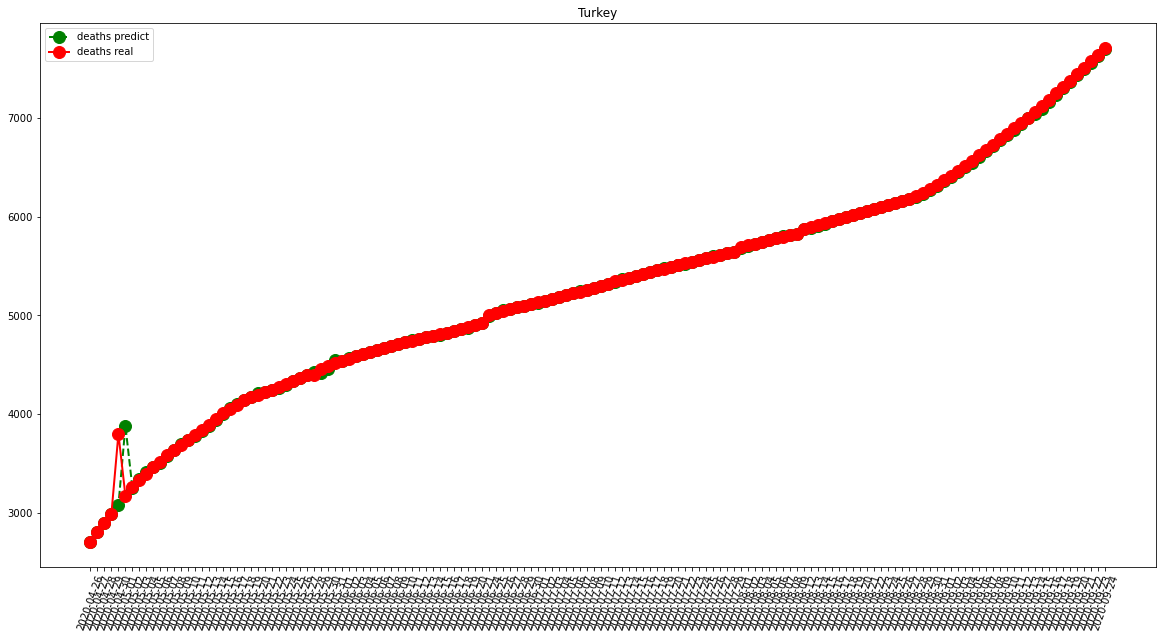

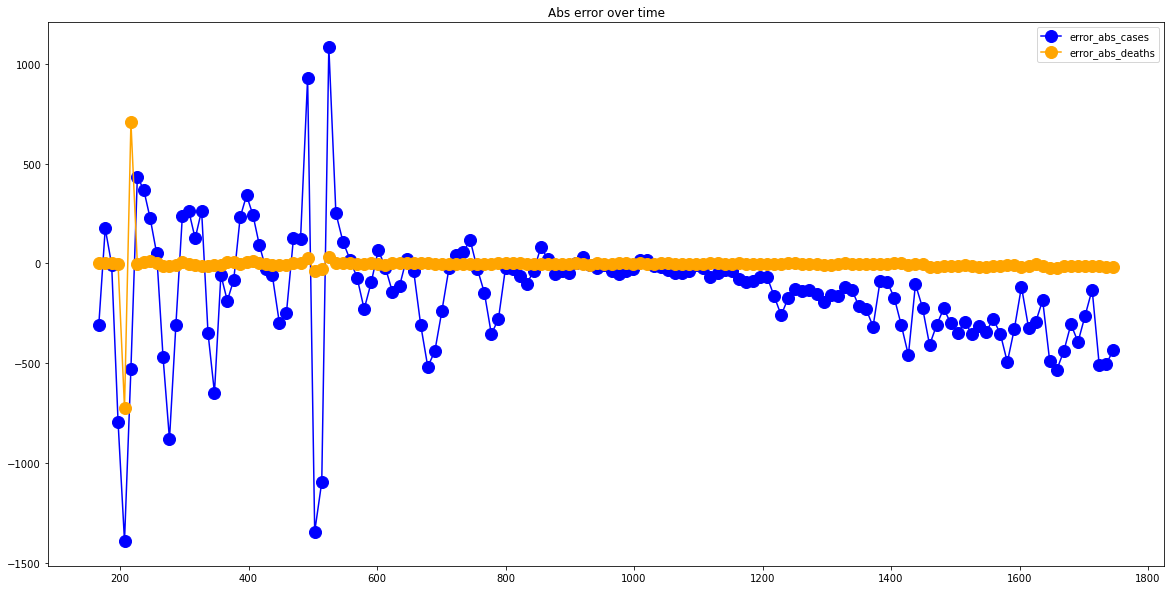

In [16]:
visShow("Turkey")

-- Brazil performances for cases --
MAE =  16698.325
RMSE =  21876.14674498993
-- Brazil performances for deaths --
MAE =  495.25
RMSE =  600.479211408133


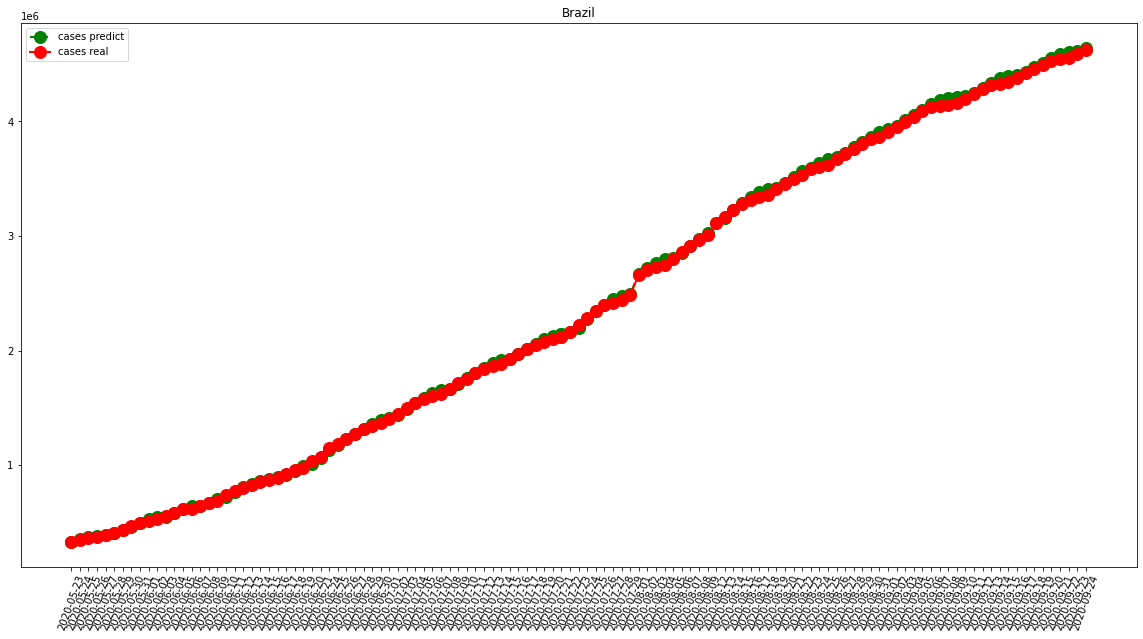

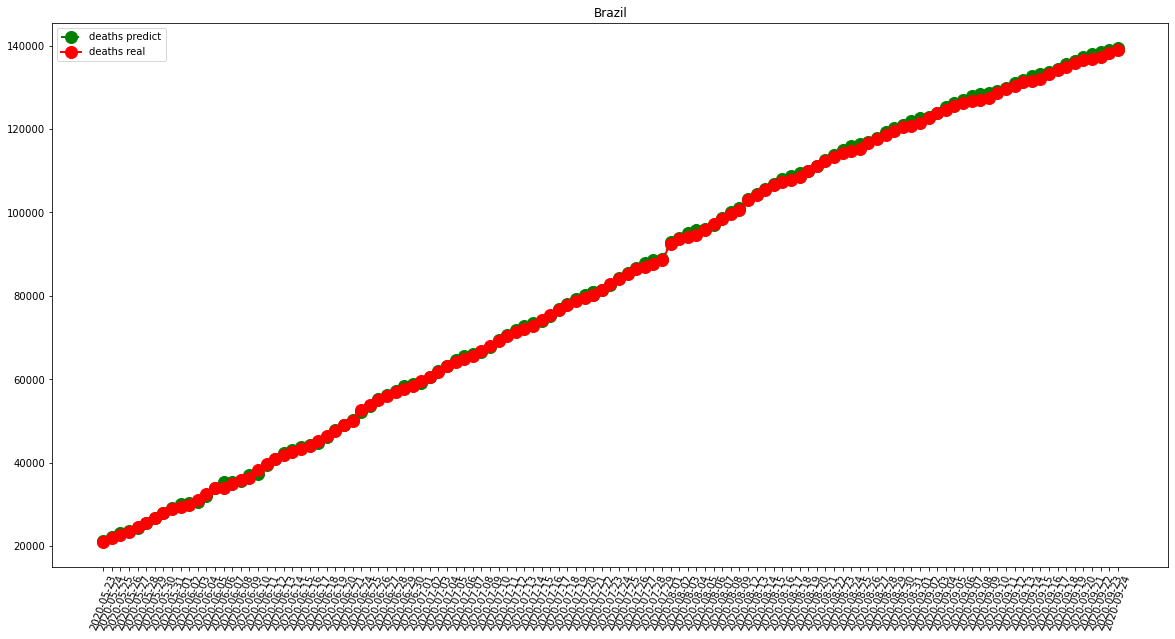

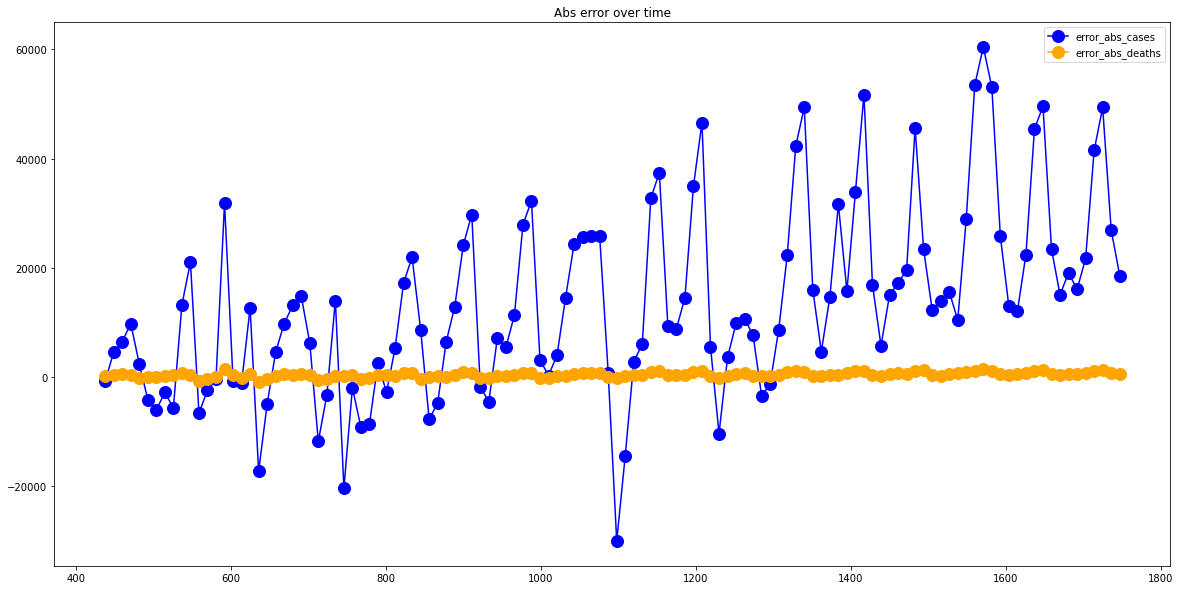

In [17]:
visShow("Brazil")

In [18]:
frame.to_csv(f"AzureSC\\Rapport\\Fullrap{date.today()}.csv")

The data's are sometimes corrected by the authorities, which causes deregulation of the curves and models (example China the 17-04, or France 05/06-04)